In [33]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

image 1/1: 1080x1920 3 persons, 7 cars
Speed: 32.5ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)


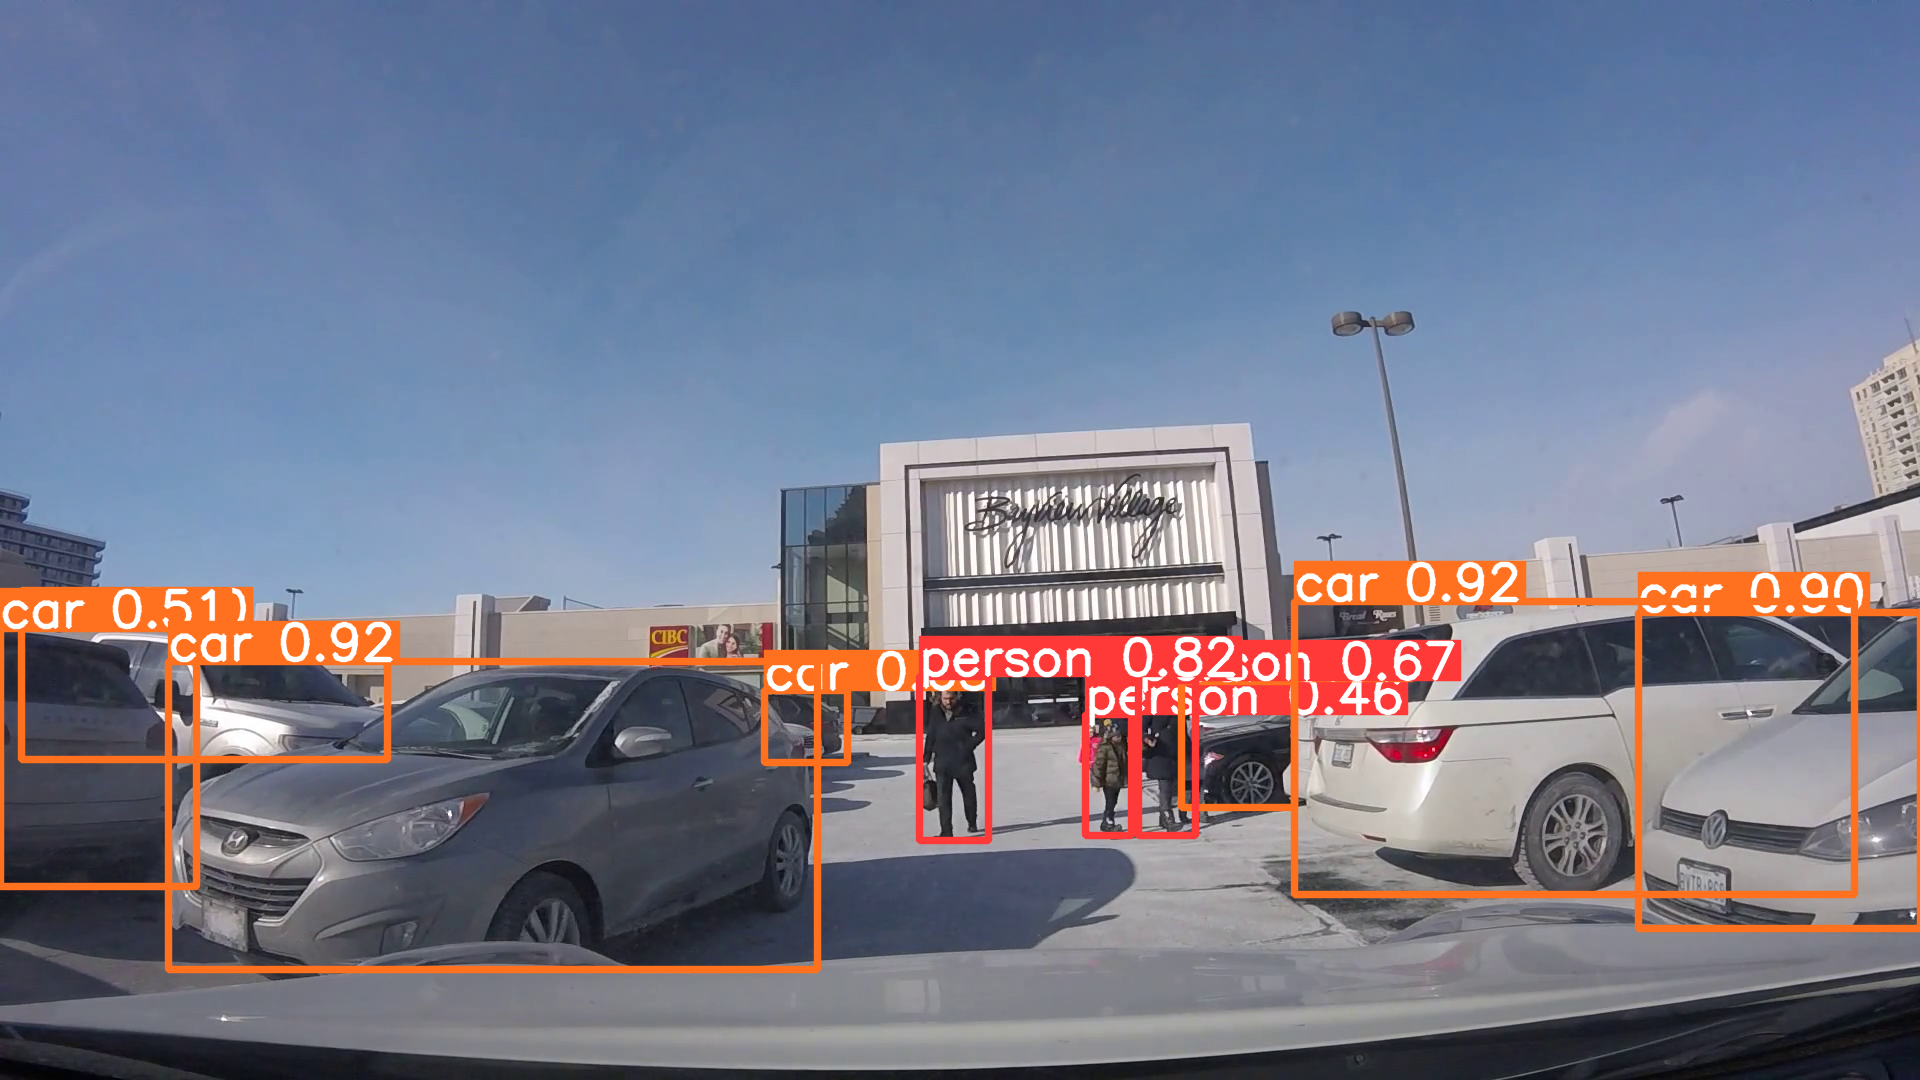

,xmin,ymin,xmax,ymax,confidence,class,name
0,168.488586,661.280945,817.143188,969.592529,0.916797,2,car
1,1294.869629,601.977173,1854.407471,894.271362,0.915925,2,car
2,1638.313721,612.979065,1920.000000,928.374573,0.904687,2,car
3,919.835815,676.536804,988.389771,840.530823,0.820735,0,person
4,1138.366943,680.082031,1195.725098,835.434998,0.674014,0,person
5,764.513550,690.626770,847.961426,762.988770,0.649179,2,car
6,1181.301758,681.854858,1294.039307,807.417358,0.574646,2,car
7,0.000000,628.995728,196.648926,886.034302,0.505468,2,car
8,1085.546143,714.352417,1131.805542,835.370239,0.459692,0,person
9,21.786781,627.012695,387.534760,759.708496,0.399747,2,car


In [50]:
# Images
imgs = ['../data/JAAD/images/video_0005/00061.png']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.show()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]

In [51]:
df = results.pandas().xyxy[0]
bounding_boxes_pedestrians = df.loc[df['class'] == 0]
bounding_boxes_pedestrians

,xmin,ymin,xmax,ymax,confidence,class,name
3,919.835815,676.536804,988.389771,840.530823,0.820735,0,person
4,1138.366943,680.082031,1195.725098,835.434998,0.674014,0,person
8,1085.546143,714.352417,1131.805542,835.370239,0.459692,0,person


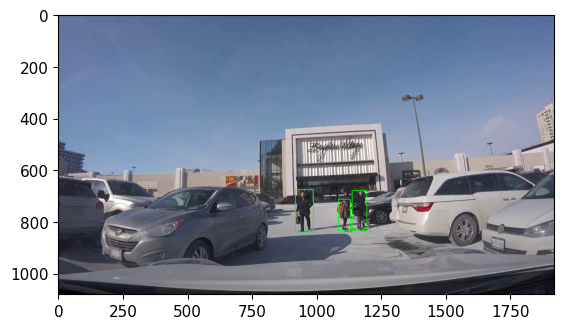

In [52]:
image = cv2.imread('../data/JAAD/images/video_0005/00061.png')

for i, row in bounding_boxes_pedestrians.iterrows():
    cv2.rectangle(image, (int(row['xmin']), int(row['ymin'])), (int(row['xmax']), int(row['ymax'])), (0, 255, 0), 2)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()
    